<h3 align="center">Codebasics ML Course: Gradient Boosting Regression Tutorial</h3>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

### Load Data

In [3]:
df = pd.read_csv("ad_spend.csv")
df.head(3)

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214


### Exploratory Data Analysis: EDA

In [4]:
df.shape

(200, 3)

In [5]:
g = df.groupby("Season")[['Revenue ($)', 'Ad Spend ($)']].mean()
g

,Revenue ($),Ad Spend ($)
Season,,
Monsoon,423.150685,517.643836
Summer,689.360656,573.836066
Winter,826.530303,552.560606


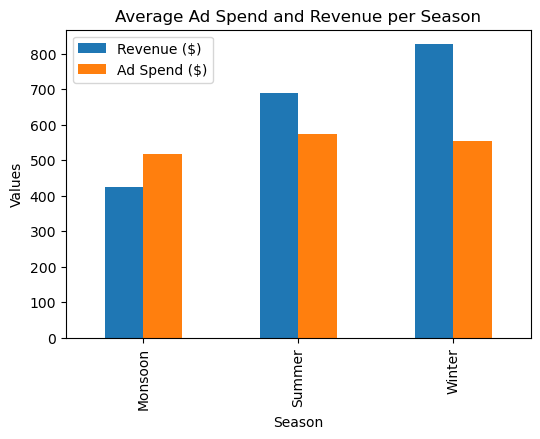

In [6]:
ax = g.plot(kind='bar', figsize=(6, 4))
ax.set_title('Average Ad Spend and Revenue per Season')
ax.set_xlabel('Season')
ax.set_ylabel('Values')
plt.show()

season: Monsoon
subdf      Ad Spend ($)   Season  Revenue ($)
0             463  Monsoon          440
2             328  Monsoon          214
3             322  Monsoon           48
6             233  Monsoon          186
8             340  Monsoon          465
..            ...      ...          ...
187           565  Monsoon          505
189           492  Monsoon          416
194           208  Monsoon           14
196           182  Monsoon          183
197           184  Monsoon           10

[73 rows x 3 columns]
season: Summer
subdf      Ad Spend ($)  Season  Revenue ($)
7             997  Summer         1273
14            712  Summer          930
16            503  Summer          626
17            597  Summer          690
18            633  Summer          804
..            ...     ...          ...
182           315  Summer          404
188           691  Summer         1020
191           142  Summer          313
195           407  Summer          609
198           380  Summer

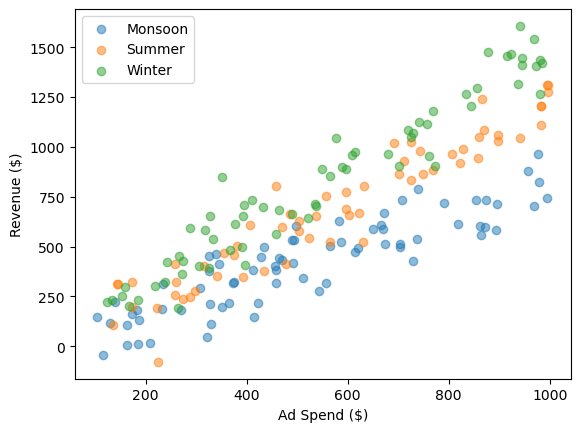

In [7]:
for season, subdf in df.groupby("Season"):
    print("season:",season)
    print("subdf",subdf)
    plt.scatter(subdf["Ad Spend ($)"], subdf["Revenue ($)"], label=season, alpha=0.5)

plt.xlabel("Ad Spend ($)")    
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()

### Feature Engineering: Encode the Categorical Data Using One Hot Encoding

In [8]:
df_encoded = pd.get_dummies(df, columns=['Season'], drop_first=True)
df_encoded

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False
3,322,48,False,False
4,726,1048,False,True
...,...,...,...,...
195,407,609,True,False
196,182,183,False,False
197,184,10,False,False
198,380,504,True,False


### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded[["Ad Spend ($)", "Season_Summer", "Season_Winter"]]
y = df_encoded["Revenue ($)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

### Train a Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8882097000477289

### Train a Decision Tree Regressor

In [11]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8972778553142061

### Train a Gradient Boosting Model

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9149899654766234

The score of Linear Regression, Decision Tree and Gradient Boosting Model is almost the same.

In [13]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

14075.189625267236

In [14]:
df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_eval.head(3)

,Actual,Predicted
59,605,677.144222
5,1125,1073.575312
20,699,626.698237


In [15]:
df_eval['Diff %'] = abs((df_eval['Predicted'] - df_eval['Actual'])*100/df_eval['Actual'])
df_eval

,Actual,Predicted,Diff %
59,605,677.144222,11.924665
5,1125,1073.575312,4.571083
20,699,626.698237,10.343600
198,504,418.202801,17.023254
52,1310,1134.088133,13.428387
19,320,170.512121,46.714962
162,944,1016.629203,7.693771
55,581,747.372975,28.635624
69,1446,1419.638973,1.823031
2,214,344.868149,61.153341


In [21]:
df_eval['Diff %'].quantile(0.50)

np.float64(12.551852401093242)